# 0. Introducción al proyecto

La idea principal de este NoteBook es comparar el desempeño de un modelo clásico de ML frente a una red neuronal diseñada completamente por mi.

Para ello abordaré un problema relativamente sencillo con un dataset extraido de Kaggle al que podéis acceder desde aquí:

 https://www.kaggle.com/datasets/therohithanand/student-academic-performance-dataset/data

Para abordar problemas del mundo real es importante realizar las preguntas correctas.

- ¿Cuál es la finalidad del proyecto?

- ¿Cuáles son las necesidades del cliente?

- ¿Qué significado tienen los resultados obtenidos?

- ¿Cuáles son las métricas con mayor impacto?

Estas podrían ser algunas de las preguntas que nos plateariamos al inicio del proyecto.

Una vez planteadas y respondidas estas preguntas, es interesante distribuir en fases el desarrollo del proyecto y aportar el contexto necesario.

Si trabajamos en un campo en el que no somos expertos, es importante realizar una investigación previa para entender el problema y el contexto en el que se desarrolla. También podemos perdirle feedback del proyecto a compañeros más experimentados.

# 1. Importación de librerias y carga de datos




In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import tensorflow as tf 


ruta = "./data/student_info.csv"

data_raw = pd.read_csv(ruta, sep=",")

data_raw.head()

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


# 2. Preprocesado del dataset

In [2]:
# Visualizamos la información de las variables
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB


Estamos trabajando con un dataset de Kaggle que por lo general ya vienen limpiados/tratados.

La parte negativa de esto es que nos alejamos de un proyecto real. 

Ya que por lo general, en un proyecto real, falta información (a causa de problemas en su recopilación o errores humanos) y estamos omitiendo la fase de tratar esa información faltante o eliminarla (aunque esto último puede ser una decisión muy drástica).

#### Descripción de las variables

- student_id -> Identificador del estudiante

- name -> Nombre del estudiante (Confidencial)

- gender -> Genero del estudiante (Male, Female, Other)

- age -> Edad del estudiante

- grade_level -> Curso en el que se encuentra el estudiante

- math_score -> Puntuación en matemáticas

- reading_score -> Puntuación en lectura

- writing_score -> Puntuación en escritura

- attendance_rate -> Tasa de asistancia

- parent_education -> Nivel educativo de sus progenitores (Bachelor´s, PhD, High School, Master´s)

- study_hours -> Horas de estudio

- internet_access -> Acceso a internet (Yes, No)

- lunch_type -> Tipo de almuerzo (Standard, Free or Reduced)

- extra_activities -> Actividades extracurriculares (Yes, No)

- final_result -> Resultado final (Pass, Fail)



Habiendo identificado todas las variables y sus tipos, podemos determinar que cambios son necesarios para realizar la fase de modelado.

In [3]:
# Pequeño análisis estadistico de las variables numéricas
data_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1000.0,15.999000,0.817109,15.000000,15.000000,16.000000,17.000000,17.000000
grade_level,1000.0,10.473000,1.136029,9.000000,9.000000,10.000000,12.000000,12.000000
math_score,1000.0,75.165000,14.304349,50.000000,63.000000,75.000000,88.000000,99.000000
reading_score,1000.0,74.293000,14.312652,50.000000,62.000000,74.000000,86.000000,99.000000
writing_score,1000.0,75.150000,14.395094,50.000000,63.000000,75.000000,88.000000,99.000000
attendance_rate,1000.0,89.879179,5.725007,80.000614,84.971772,89.980889,94.629778,99.954988
study_hours,1000.0,2.978380,1.167780,1.015673,1.955287,2.962665,3.994360,4.997843


In [4]:
# Comprobamos que no existen duplicados

data_raw.duplicated().value_counts()

False    1000
Name: count, dtype: int64

#### Tranformación de variables: 

Como vimos anteriormente, exiten variables que no son de tipo numérico por lo que debemos realizar transformaciones para poder tenerlas en cuenta en la fase de modelado.



In [5]:
# Transformación de variables

data_raw["lunch_type"] = data_raw["lunch_type"].map({"Standard":1, "Free or reduced":0})
data_raw["internet_access"]= data_raw["internet_access"].map({"Yes":1,"No":0})
data_raw["extra_activities"]= data_raw["extra_activities"].map({"Yes":1,"No":0})
data_raw["final_result"]= data_raw["final_result"].map({"Pass":1,"Fail":0})

data_raw.head()

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,1,0,1,0
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,0,0,0,1
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,0,0,0,0
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,0,1,0,1
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,1,0,0,1


Usaremos `map` para transformar las variables categóricas en numéricas, cuando no superen un número determinado de categorías.

In [6]:
# Transformación de variables categóricas a numéricas

data_encoder= pd.get_dummies(data_raw, columns=["gender","parent_education"])

data_encoder.head()

,student_id,name,age,grade_level,math_score,reading_score,writing_score,attendance_rate,study_hours,internet_access,lunch_type,extra_activities,final_result,gender_Female,gender_Male,gender_Other,parent_education_Bachelor's,parent_education_High School,parent_education_Master's,parent_education_PhD
0,S1,Student_1,17,10,74,61,90,94.660002,4.120192,1,0,1,0,False,False,True,False,False,True,False
1,S2,Student_2,17,12,99,70,91,93.173227,2.886505,0,0,0,1,False,True,False,True,False,False,False
2,S3,Student_3,17,9,59,60,99,98.631098,1.909926,0,0,0,0,False,False,True,False,False,False,True
3,S4,Student_4,17,12,70,88,69,96.419620,1.664740,0,1,0,1,False,False,True,False,False,False,True
4,S5,Student_5,15,9,85,77,94,91.332105,2.330918,1,0,0,1,False,True,False,False,False,False,True


Para las variables categóricas politómicas (aquellas que tienen más de dos categorías) como `gender` y `parent_education` utilizaremos la técnica de One-Hot Encoding. Esta técnica crea variables binarias para cada categoría, permitiendo que el modelo pueda interpretar estas variables correctamente.

# 3. Exploración de los datos 

Como vimos con anterioridad no tenemos valores faltantes ni duplicados, adicional a esto, es recomendable detectar si tenemos un dataset desbalanceado.

La extensión de Data Wrangler nos permite identificar rapidamne un dataset desbalanceado, en este caso no es así.



In [7]:
# Condiciones de filtrado

data_encoder[(data_encoder["gender_Male"] == 1) & (data_encoder["extra_activities"] == 1)].groupby("final_result").size()

final_result
0    102
1     89
dtype: int64

In [8]:

data_encoder[(data_encoder["gender_Female"] == 1) & (data_encoder["extra_activities"] == 1)].groupby("final_result").size()

final_result
0    86
1    99
dtype: int64

In [9]:

data_encoder[(data_encoder["gender_Other"] == 1) & (data_encoder["extra_activities"] == 1)].groupby("final_result").size()

final_result
0    71
1    88
dtype: int64

In [21]:
# Detección de valores atípicos
# Rangos intercuartílicos (IQR)

Q1 = data_encoder["attendance_rate"].quantile(0.25)
Q3 = data_encoder["attendance_rate"].quantile(0.75)
IQR = Q3 - Q1
outliers = data_encoder[(data_encoder["attendance_rate"] < (Q1 - 1.5 * IQR)) | (data_encoder["attendance_rate"] > (Q3 + 1.5 * IQR))]
print(f"Número de valores atípicos: {len(outliers)}")

Número de valores atípicos: 0


## 3.1 Gráficas 

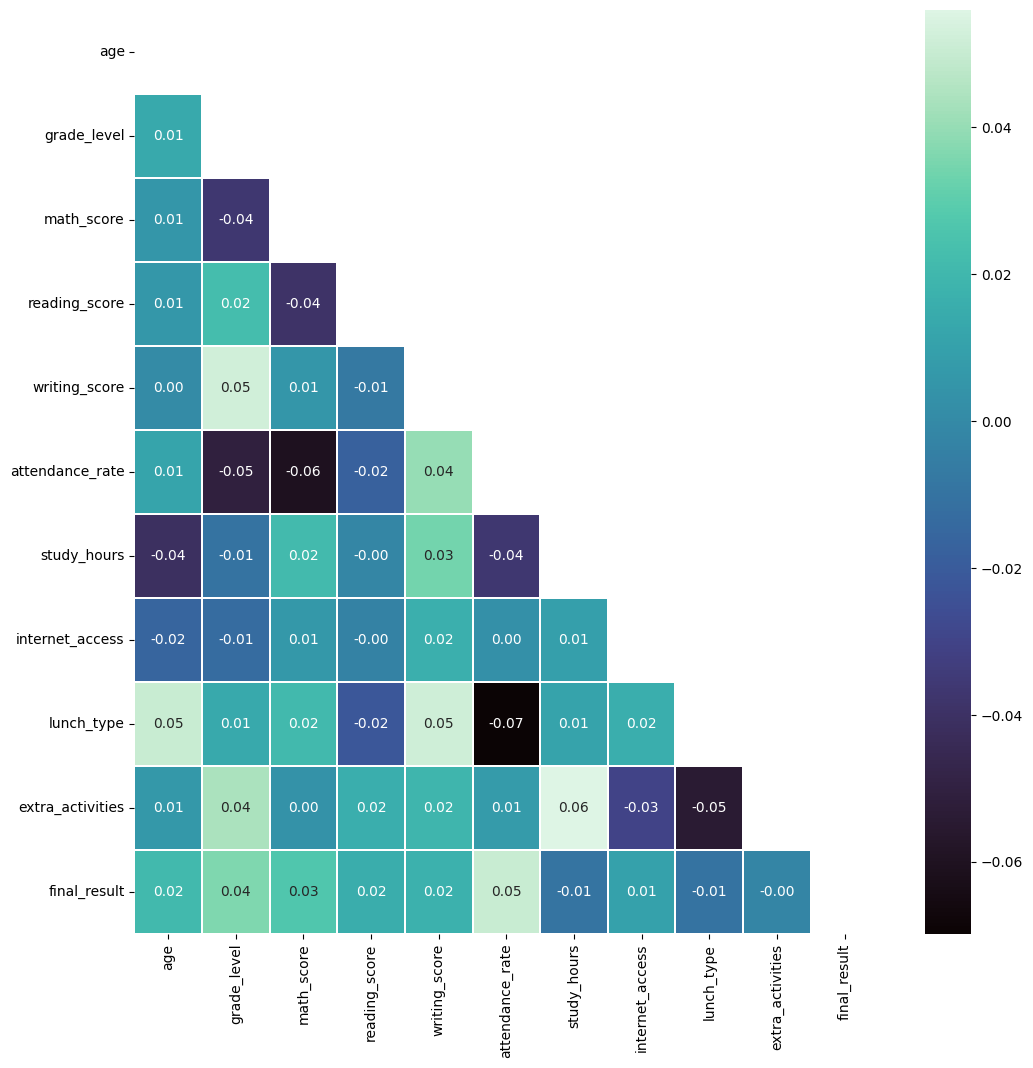

In [10]:
# Mapa de correlación entre variables

plt.figure(figsize=(12,12))
corr =data_raw.corr(numeric_only=True)
mask= np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True,cmap="mako",fmt=".2f",linewidths=0.3)
plt.show()



#### Correlación entre variables

La correlación entre variables se puede interpretar de 3 formas:

- Si la correlación es positiva, cuando una variable aumenta la otra tambien lo hace. / Colores cálidos

- Si la correlación es nula, no existe relación entre las variables.

- Si la correlación es negativa, cuando una variable aumenta la otra disminuye. / Colores frios

Considerando esto, podemos leer/traducir el gráfico superior con facilidad.

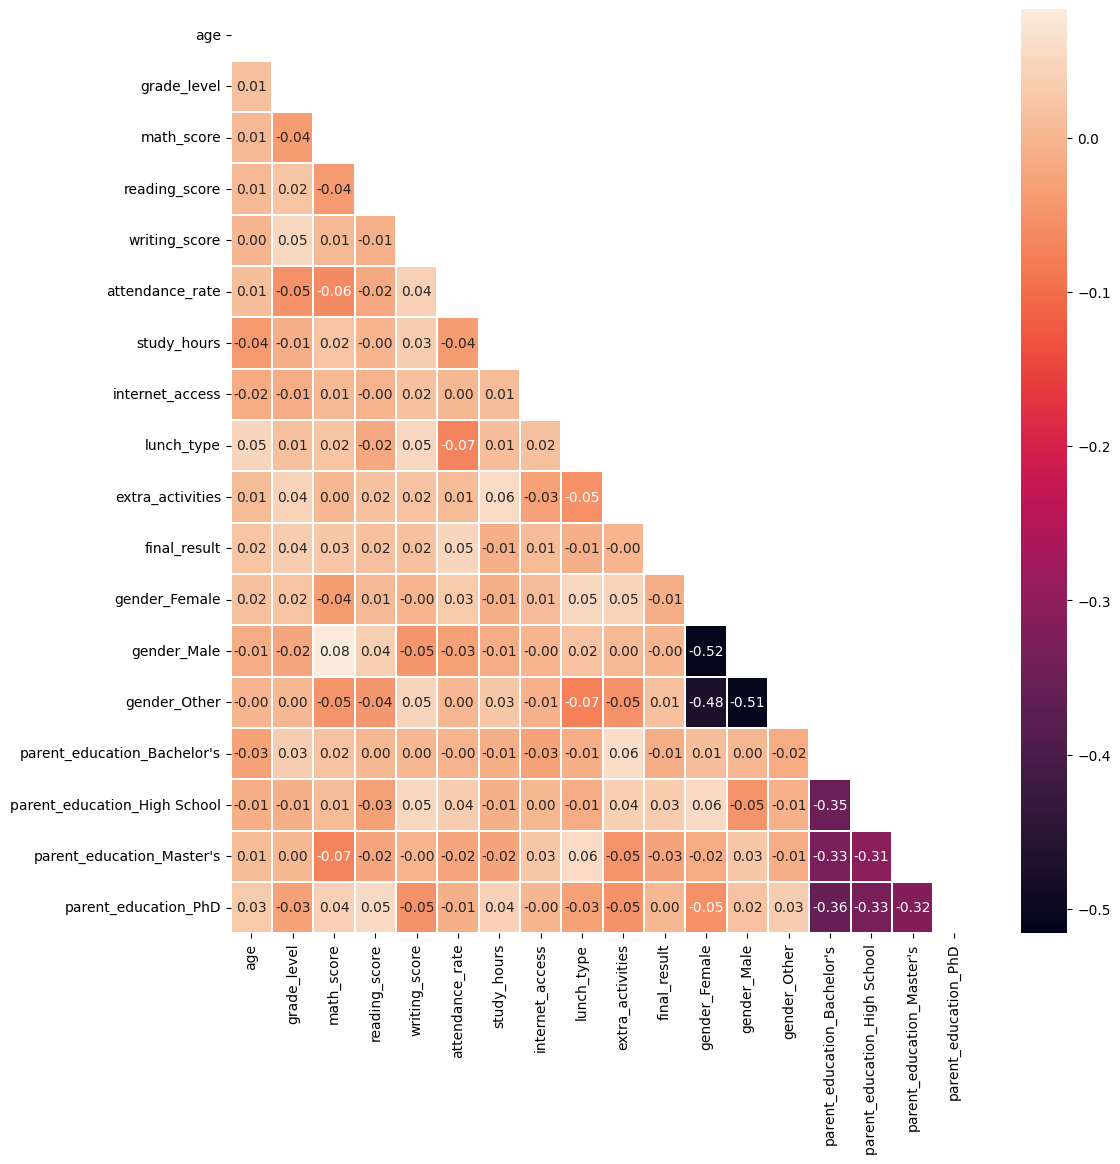

In [11]:
# Mapa de correlación entre variables considerando el one-hot encoding

plt.figure(figsize=(12,12))
corr =data_encoder.corr(numeric_only=True)
mask= np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True,fmt=".2f",linewidths=0.3)
plt.show()


Aquí tenemos un heatmap de correlaciones pero es importante tener en cuenta que tenemos variables que están usando One-Hot-Encoding y otras que usan `map` para su transformación, por lo que la interpretación de la correlación debe hacerse con cuidado.

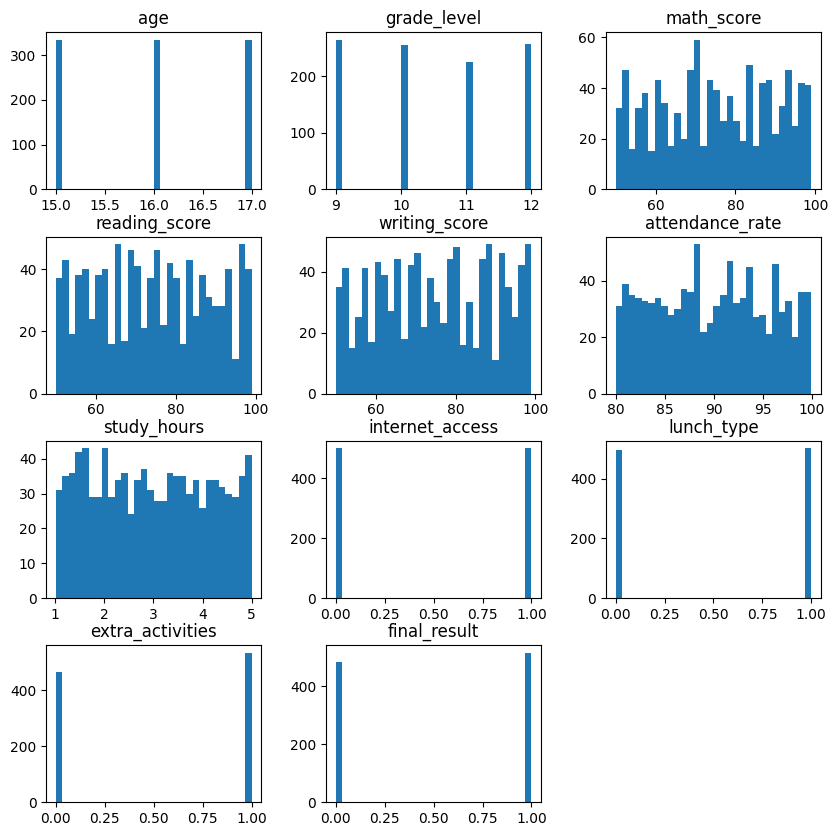

In [32]:
# Histograma de las variables

data_encoder.hist(bins=30,figsize=(10,10),grid=False)
plt.show()


El histograma nos permite ver la distribución de las variables numéricas, lo que nos ayuda a identificar si hay sesgos o distribuciones no normales.

Text(0.5, 1.0, 'Boxplot de asistencia por resultado final')

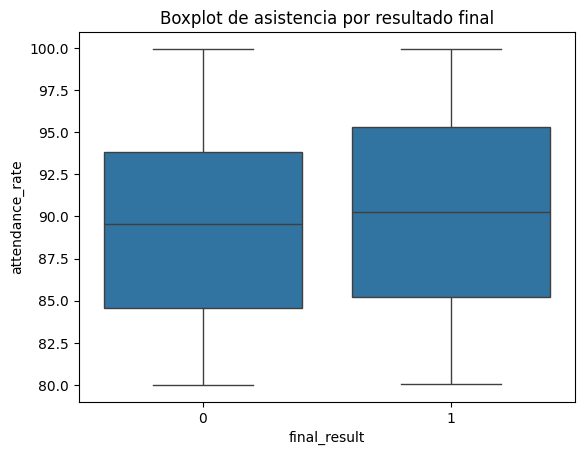

In [ ]:
# Boxplot de asistencia por resultado final

sns.boxplot(x="final_result",y="attendance_rate",data=data_encoder)
plt.title("Boxplot de asistencia por resultado final")

# 4. Modelado regresión lineal

In [15]:
# División de los datos

x = data_raw.drop("final_result",axis=1)
y = data_raw["final_result"]

# Dividir los datos en entrenamiento y test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


¿Escalado de los datos es necesario?

# 5. Modelado red neuronal

Para crear nuestra red neuronal usaremos tensorflow y keras.



In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Definición del modelo de red neuronal

model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

# Compilación del modelo

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluación del modelo

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


ValueError: Invalid dtype: object